In [1]:
import pandas as pd
from numpy import genfromtxt
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [2]:
dataset=genfromtxt('heart_dis.csv',dtype=float,delimiter=',')

In [3]:
x=dataset[:,0]
y=dataset[:,1]


In [4]:
x

array([63., 67., 67., 37., 41., 56., 62., 57., 63., 53., 57., 56., 56.,
       44., 52., 57., 48., 54., 48., 49., 64., 58., 58., 58., 60., 50.,
       58., 66., 43., 40., 69., 60., 64., 59., 44., 42., 43., 57., 55.,
       61., 65., 40., 71., 59., 61., 58., 51., 50., 65., 53., 41., 65.,
       44., 44., 60., 54., 50., 41., 54., 51., 51., 46., 58., 54., 54.,
       60., 60., 54., 59., 46., 65., 67., 62., 65., 44., 65., 60., 51.,
       48., 58., 45., 53., 39., 68., 52., 44., 47., 53., 53., 51., 66.,
       62., 62., 44., 63., 52., 59., 60., 52., 48., 45., 34., 57., 71.,
       49., 54., 59., 57., 61., 39., 61., 56., 52., 43., 62., 41., 58.,
       35., 63., 65., 48., 63., 51., 55., 65., 45., 56., 54., 44., 62.,
       54., 51., 29., 51., 43., 55., 70., 62., 35., 51., 59., 59., 52.,
       64., 58., 47., 57., 41., 45., 60., 52., 42., 67., 55., 64., 70.,
       51., 58., 60., 68., 46., 77., 54., 58., 48., 57., 52., 54., 35.,
       45., 70., 53., 59., 62., 64., 57., 52., 56., 43., 53., 48

In [5]:
X=dataset[:,0:12]
Y=dataset[:,13]

In [6]:
#initialize parameter
f_size=14
gene=100
oxy=10

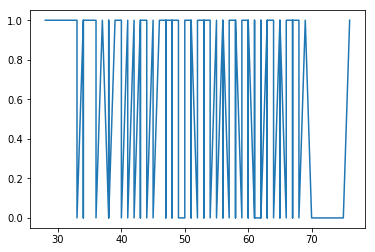

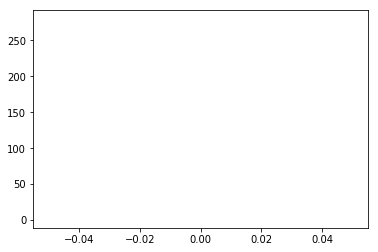

In [7]:


# sort the data in x and rearrange y accordingly
sortId = np.argsort(x)
x = x[sortId]
y = y[sortId]

# this way the x-axis corresponds to the index of x
plt.plot(x-1, y)
plt.show()
maxm = argrelextrema(y, np.greater)  # (array([1, 3, 6]),)
minm = argrelextrema(y, np.less)  # (array([2, 5, 7]),)
plt.plot(maxm)

In [8]:
a=maxm[0]
a
a[::-1]

array([278, 276, 248, 236, 234, 213, 147, 134, 129, 122, 120,  68,  66,
        57,  44,  26,  24,   3], dtype=int64)

In [9]:
val=np.r_[True, maxm[0] < maxm[0][::-1]] & np.r_[maxm[0][::-1] < maxm[0], True]


In [10]:
true_index=[i for i,x in enumerate(val) if x]
xbest=a[true_index]
xbest=xbest[0]
xbest

129

In [11]:
import numpy.linalg as LA

In [12]:
C = np.corrcoef(X, rowvar=0)
C.shape

(12, 12)

In [13]:
eva, evc = LA.eig(C)

In [14]:
eva1 = np.sort(eva)[::-1]
eva2 = np.cumsum(eva1/np.sum(eva1))


for row in C :
        print("{0:1d} {1:3f} {2:3f}".format(int(row[0]), row[1], row[2]))

0 -0.097542 0.104139
0 1.000000 0.010084
0 0.010084 1.000000
0 -0.064456 -0.036077
0 -0.199915 0.072319
0 0.047862 -0.039975
0 0.021647 0.067505
0 -0.048663 -0.334422
0 0.146201 0.384060
0 0.102173 0.202277
0 0.037533 0.152050
0 0.104450 0.226230


In [15]:
from sklearn.feature_selection import VarianceThreshold

In [16]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [17]:
sel.fit_transform(X)[0]

array([ 63. ,   1. ,   1. , 145. , 233. ,   2. , 150. ,   0. ,   2.3,
         3. ,   0. ])

In [18]:
import random
import itertools
for x in range(5):
    print(random.randint(0,13))

0
11
1
10
9


In [19]:
s=[0,1,2]
Feature_subset=[]

val=set(itertools.permutations(s))
val
#generating random population
    

{(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)}

In [20]:
s=[0,1,2,3,4,5,6]
Feature_subset=[]

val=set(itertools.permutations(s,4))


In [21]:
#initialize parameter
num_of_gene=100
oxy_reserve=10
iteration=50

In [26]:
#random population generation
penquin_group=[]
from itertools import combinations 
comb = combinations([0,1,2,3,4,5,6,7,8,9,10,11,12], 6) 
for i in list(comb): 
    penquin_group.append(i) 
g1=penquin_group[0]
penquin_group

[(0, 1, 2, 3, 4, 5),
 (0, 1, 2, 3, 4, 6),
 (0, 1, 2, 3, 4, 7),
 (0, 1, 2, 3, 4, 8),
 (0, 1, 2, 3, 4, 9),
 (0, 1, 2, 3, 4, 10),
 (0, 1, 2, 3, 4, 11),
 (0, 1, 2, 3, 4, 12),
 (0, 1, 2, 3, 5, 6),
 (0, 1, 2, 3, 5, 7),
 (0, 1, 2, 3, 5, 8),
 (0, 1, 2, 3, 5, 9),
 (0, 1, 2, 3, 5, 10),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 5, 12),
 (0, 1, 2, 3, 6, 7),
 (0, 1, 2, 3, 6, 8),
 (0, 1, 2, 3, 6, 9),
 (0, 1, 2, 3, 6, 10),
 (0, 1, 2, 3, 6, 11),
 (0, 1, 2, 3, 6, 12),
 (0, 1, 2, 3, 7, 8),
 (0, 1, 2, 3, 7, 9),
 (0, 1, 2, 3, 7, 10),
 (0, 1, 2, 3, 7, 11),
 (0, 1, 2, 3, 7, 12),
 (0, 1, 2, 3, 8, 9),
 (0, 1, 2, 3, 8, 10),
 (0, 1, 2, 3, 8, 11),
 (0, 1, 2, 3, 8, 12),
 (0, 1, 2, 3, 9, 10),
 (0, 1, 2, 3, 9, 11),
 (0, 1, 2, 3, 9, 12),
 (0, 1, 2, 3, 10, 11),
 (0, 1, 2, 3, 10, 12),
 (0, 1, 2, 3, 11, 12),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7),
 (0, 1, 2, 4, 5, 8),
 (0, 1, 2, 4, 5, 9),
 (0, 1, 2, 4, 5, 10),
 (0, 1, 2, 4, 5, 11),
 (0, 1, 2, 4, 5, 12),
 (0, 1, 2, 4, 6, 7),
 (0, 1, 2, 4, 6, 8),
 (0, 1, 2, 4, 6, 9),
 (0, 1,

In [ ]:
t=0
X(t+1)=X(t)+

In [ ]:
def penguin():
    while(iteration<num_of_gene):
        for j in penquin_group:
            print(j)
            
                
penguin()

In [ ]:
t=0
solution=[]
while(oxy_reserve!=0):
    #update penguin position
    for i in penguin_group:
        for j in range(0,6):
            penquin_group[t+1]=